In [1]:
import os
import pickle
from typing import Optional

import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from transformers.modelcard import parse_log_history

/home/abthuy/Documents/PhD research/qdet-comparison/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
##### INPUTS #####
dataset_name = "race_4000"
seed = 123
model_name = "DistilBERT"
encoding = "question_all"

## Test metrics

In [3]:
def get_metrics(
    dataset_name: str,
    model_name: str,
    encoding: Optional[str],
    seed: Optional[int],
    init: bool = False,
) -> pd.DataFrame:
    """Read metrics from output directory and return as a dataframe."""
    if seed is None:
        output_dir = os.path.join("output", dataset_name)
    else:
        output_dir = os.path.join("output", dataset_name, "seed_" + str(seed))

    init_str = "_init" if init else ""
    encoding_str = f"_{encoding}" if encoding is not None else ""
    read_path = os.path.join(
        output_dir, f"eval_metrics_{model_name}{encoding_str}{init_str}.csv"
    )
    print(f"reading path: '{read_path}'")

    metrics = pd.read_csv(read_path)
    metrics = (
        metrics.transpose()
        .reset_index()
        .rename(columns={"index": "metric", 0: "value"})
    )
    return metrics

### Before training

In [4]:
metrics_init = get_metrics(dataset_name, model_name, encoding, seed, init=True)
metrics_init

reading path: 'output/race_4000/seed_123/eval_metrics_DistilBERT_question_all_init.csv'


,metric,value
0,test_accuracy,0.708958
1,train_accuracy,0.499875


### After training

In [5]:
metrics = get_metrics(dataset_name, model_name, encoding, seed, init=False)
metrics

reading path: 'output/race_4000/seed_123/eval_metrics_DistilBERT_question_all.csv'


,metric,value
0,test_accuracy,0.853668
1,train_accuracy,0.955375


## Training logs

In [6]:
def get_train_logs(
    dataset_name: str, model_name: str, encoding: str, seed: int
) -> tuple:
    """Read training logs from output directory and return as a dictionary."""
    output_dir = os.path.join("output", dataset_name, "seed_" + str(seed))

    with open(
        os.path.join(output_dir, model_name + "_" + encoding, "train_logs.pickle"), "rb"
    ) as handle:
        logs = pickle.load(handle)
    train_log, lines, eval_results = parse_log_history(
        logs
    )  # NOTE: func from transformers.modelcard
    return train_log, lines, eval_results


train_log, lines, eval_results = get_train_logs(
    dataset_name, model_name, encoding, seed
)

print("=" * 3, "train_log", "=" * 3)
pprint(train_log)
print("=" * 3, "lines", "=" * 3)
pprint(lines)
print("=" * 3, "eval_results", "=" * 3)
pprint(eval_results)

=== train_log ===
{'epoch': 2.5,
 'step': 1250,
 'total_flos': 1324673986560000.0,
 'train_loss': 0.2773561737060547,
 'train_runtime': 494.4779,
 'train_samples_per_second': 48.536,
 'train_steps_per_second': 3.034}
=== lines ===
[{'Accuracy': 0.7086146920401064,
  'Epoch': 0.1,
  'Step': 50,
  'Training Loss': 'No log',
  'Validation Loss': 0.5572146773338318},
 {'Accuracy': 0.8549212195621035,
  'Epoch': 0.2,
  'Step': 100,
  'Training Loss': 'No log',
  'Validation Loss': 0.34232717752456665},
 {'Accuracy': 0.8510333537957847,
  'Epoch': 0.3,
  'Step': 150,
  'Training Loss': 'No log',
  'Validation Loss': 0.34957242012023926},
 {'Accuracy': 0.83036627788009,
  'Epoch': 0.4,
  'Step': 200,
  'Training Loss': 'No log',
  'Validation Loss': 0.3990931808948517},
 {'Accuracy': 0.8512379783098015,
  'Epoch': 0.5,
  'Step': 250,
  'Training Loss': 'No log',
  'Validation Loss': 0.33729204535484314},
 {'Accuracy': 0.861878453038674,
  'Epoch': 0.6,
  'Step': 300,
  'Training Loss': 'No lo

In [7]:
def remove_nesting(logs: list[dict[str, float]]) -> list[dict[str, float]]:
    """Remove unnecessary nesting from logs."""
    new_logs = []
    for log_epoch in logs:
        tmp_dict = {}
        for key, value in log_epoch.items():
            if isinstance(value, dict):
                nested_keys = list(value.keys())
                if len(nested_keys) == 1 and key.lower() == nested_keys[0]:
                    tmp_dict[key] = value[nested_keys[0]]
            else:
                tmp_dict[key] = value
        new_logs.append(tmp_dict)
    return new_logs


all_logs = remove_nesting(lines)
pprint(all_logs)

[{'Accuracy': 0.7086146920401064,
  'Epoch': 0.1,
  'Step': 50,
  'Training Loss': 'No log',
  'Validation Loss': 0.5572146773338318},
 {'Accuracy': 0.8549212195621035,
  'Epoch': 0.2,
  'Step': 100,
  'Training Loss': 'No log',
  'Validation Loss': 0.34232717752456665},
 {'Accuracy': 0.8510333537957847,
  'Epoch': 0.3,
  'Step': 150,
  'Training Loss': 'No log',
  'Validation Loss': 0.34957242012023926},
 {'Accuracy': 0.83036627788009,
  'Epoch': 0.4,
  'Step': 200,
  'Training Loss': 'No log',
  'Validation Loss': 0.3990931808948517},
 {'Accuracy': 0.8512379783098015,
  'Epoch': 0.5,
  'Step': 250,
  'Training Loss': 'No log',
  'Validation Loss': 0.33729204535484314},
 {'Accuracy': 0.861878453038674,
  'Epoch': 0.6,
  'Step': 300,
  'Training Loss': 'No log',
  'Validation Loss': 0.3332015573978424},
 {'Accuracy': 0.8326171475342746,
  'Epoch': 0.7,
  'Step': 350,
  'Training Loss': 'No log',
  'Validation Loss': 0.4055136442184448},
 {'Accuracy': 0.8287292817679558,
  'Epoch': 0.8,

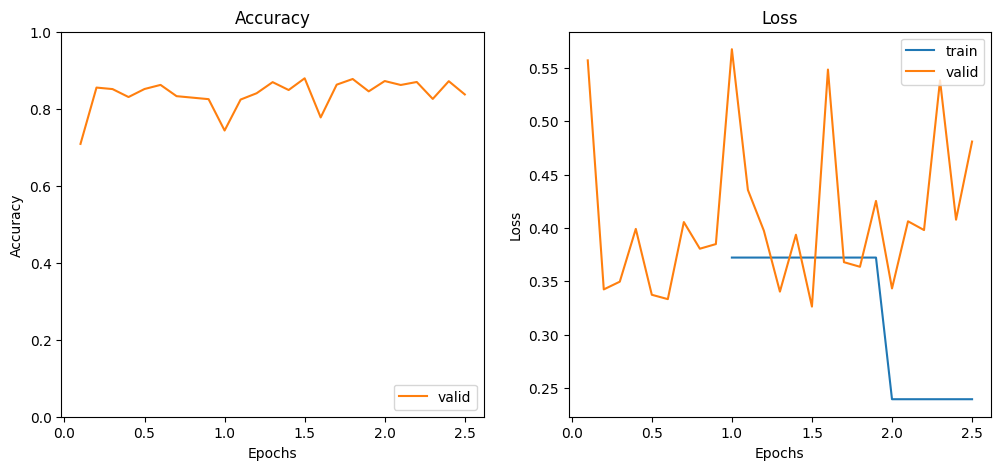

In [8]:
def plot_history(all_logs: list[dict[str, float]], metric: str) -> None:
    """Plot metric and loss in function of number of epochs.
    Parameters
    ----------
    all_logs : list[dict[str, float]]
        List of dictionaries containing the training logs for each epoch.
    metric : str
        Metric to plot (in addition to loss).
    """

    epochs_arr = [log_epoch["Epoch"] for log_epoch in all_logs]
    train_loss_arr = [log_epoch["Training Loss"] for log_epoch in all_logs]
    train_loss_arr = [  # NOTE: replace "No log" with None for plotting
        None if train_loss == "No log" else train_loss for train_loss in train_loss_arr
    ]
    val_loss_arr = [log_epoch["Validation Loss"] for log_epoch in all_logs]
    metric_arr = [log_epoch[metric] for log_epoch in all_logs]

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_arr, metric_arr, color="tab:orange")
    plt.ylim(0, 1)
    plt.title(metric)
    plt.ylabel(metric)
    plt.xlabel("Epochs")
    plt.legend(["valid"], loc="lower right")

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_arr, train_loss_arr)
    plt.plot(epochs_arr, val_loss_arr)
    plt.title("Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(["train", "valid"], loc="upper right")

    plt.show()


# metric = "R Squared"
# metric = "Rmse"
metric = "Accuracy"
plot_history(all_logs, metric)